In [94]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,6)
pd.options.display.float_format = "{:,.1f}".format
plt.style.use('seaborn-v0_8-ticks')

<h3>Loading the dataset into DataFrame</h3>

In [95]:
df = pd.read_csv(r"D:\nevinphilbert\Portfolio\Python Builder\Movies Correlation Analysis\movies.csv")

<h3>Checking the data, looking for overview</h3>

In [96]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,"927,000.0",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.0","46,998,772.0",Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,"65,000.0",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.0","58,853,106.0",Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,"1,200,000.0",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.0","538,375,067.0",Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,"221,000.0",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.0","83,453,539.0",Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,"108,000.0",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.0","39,846,344.0",Orion Pictures,98.0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


<h4>Checking total of rows and columns</h4>

In [98]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 7668
Columns: 15


<h4>I want to see the empty value of each columns</h4>

In [99]:
df.isna().sum().sort_values(ascending=False)

budget      2171
gross        189
rating        77
company       17
runtime        4
score          3
votes          3
writer         3
country        3
released       2
star           1
name           0
genre          0
year           0
director       0
dtype: int64

In [100]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

budget     28.3
gross       2.5
rating      1.0
company     0.2
runtime     0.1
score       0.0
votes       0.0
writer      0.0
country     0.0
released    0.0
star        0.0
name        0.0
genre       0.0
year        0.0
director    0.0
dtype: float64

<h4>As we can see, there are 5 columns that contain null value inside of it.<br>
    I believe it's best to either fill those missing value using mean/median or delete the rows that has null value.<br>
    But to decide that, we need have a deeper understanding of the data first.</h4>

<ol>
    <li>
        Budget refers to the amount of money allocated for the production of a film. Film budgets can vary significantly depending on various factors, it is a crucial aspect of its production as it determines the resources available for creating the film. The budget also influences the overall production value and quality of the final film.
    </li>
    <li>
        Gross typically refers to the total revenue generated by a film at the box office. The gross revenue is an important metric used to evaluate the commercial success of a film. A high gross indicates that the film has performed well at the box office and has attracted a significant audience, while a low gross may suggest that the film has not been as successful.
    </li>
    <li>
        Rating refers to the evaluation or classification assigned to a film based on its content. Film ratings are typically provided by government regulatory bodies, film classification boards, or industry organizations to inform viewers about the suitability of a film for certain audiences.
    </li>
    <li>
        Company typically refers to a production company or film studio responsible for producing, financing, and sometimes distributing movies.</li>
    <li>
        Runtime represents the amount of time it takes for the entire film to play from the opening credits to the closing credits.
    </li>
</ol>

Based on our conclusion, I believe it's best to assume that we need to fill budget, we should drop the gross, and we need to fill the rating, company and runtime.
But before we conclude what to fill the na values, we need to delve deeper into the data to check outliers and other factors that may ruin our analysis and skew it with bias.

<h3>Cleaning the data</h3>

<h5>We need to clean data from null values, let's start from the column that has the most null values and is a numeric datatype first</h5>
<h5><b>Budget Column</b></h5>

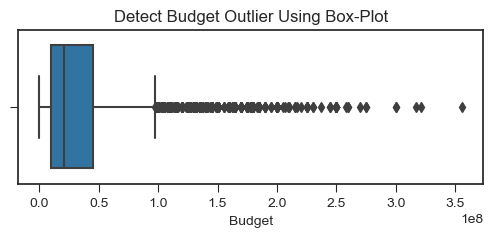

In [101]:
#let's check the budget column values using boxplot

plt.figure(figsize=(6, 2))
sns.boxplot(x=df["budget"])
plt.xlabel("Budget")
plt.title("Detect Budget Outlier Using Box-Plot")
plt.show()

In [102]:
df['budget'].describe()

count         5,497.0
mean     35,589,876.2
std      41,457,296.6
min           3,000.0
25%      10,000,000.0
50%      20,500,000.0
75%      45,000,000.0
max     356,000,000.0
Name: budget, dtype: float64

<h4>Since we have too many outliers that affected the means of budget column, I believe it's best to use median to fill the missing values in budgets</h4>

In [103]:
df['budget'].fillna(df['budget'].median(),inplace=True)

In [104]:
#checking the dataframe
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

gross      2.5
rating     1.0
company    0.2
runtime    0.1
score      0.0
votes      0.0
writer     0.0
country    0.0
released   0.0
star       0.0
name       0.0
genre      0.0
year       0.0
director   0.0
budget     0.0
dtype: float64

<h5><b>Gross Column</b></h5>

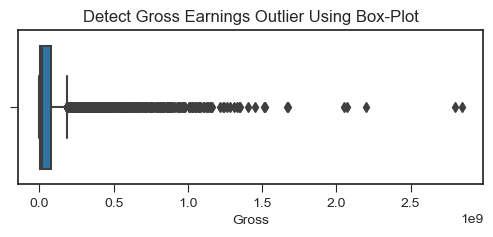

In [105]:
plt.figure(figsize=(6, 2))
sns.boxplot(x=df["gross"])
plt.xlabel("Gross")
plt.title("Detect Gross Earnings Outlier Using Box-Plot")
plt.show()

In [106]:
df['gross'].describe()

count           7,479.0
mean       78,500,541.0
std       165,725,124.3
min               309.0
25%         4,532,055.5
50%        20,205,757.0
75%        76,016,691.5
max     2,847,246,203.0
Name: gross, dtype: float64

I believe it's best to drop the gross value after considering most of aspects that might factor the data if it's filled with some value

In [107]:
df.dropna(how='all', subset='gross', inplace=True)

In [108]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

rating     0.7
company    0.1
writer     0.0
country    0.0
runtime    0.0
name       0.0
genre      0.0
year       0.0
released   0.0
score      0.0
votes      0.0
director   0.0
star       0.0
budget     0.0
gross      0.0
dtype: float64

<h5><b>Rating Column</b></h5>

In [109]:
df['rating'].describe()

count     7425
unique      12
top          R
freq      3613
Name: rating, dtype: object

let's fill the rating column with the most appeared value.

In [110]:
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

<h5><b>Company Column</b></h5>

In [111]:
df['company'].describe()

count                   7469
unique                  2276
top       Universal Pictures
freq                     376
Name: company, dtype: object

In [112]:
df['company'].fillna(df['company'].mode()[0], inplace=True)

In [113]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

writer     0.0
country    0.0
runtime    0.0
name       0.0
rating     0.0
genre      0.0
year       0.0
released   0.0
score      0.0
votes      0.0
director   0.0
star       0.0
budget     0.0
gross      0.0
company    0.0
dtype: float64

<b>let's fill all column that has null value with the most appeared value.</b>

In [114]:
#checking if there is no more NA value

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7479 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7479 non-null   object 
 1   rating    7479 non-null   object 
 2   genre     7479 non-null   object 
 3   year      7479 non-null   int64  
 4   released  7479 non-null   object 
 5   score     7479 non-null   float64
 6   votes     7479 non-null   float64
 7   director  7479 non-null   object 
 8   writer    7476 non-null   object 
 9   star      7479 non-null   object 
 10  country   7478 non-null   object 
 11  budget    7479 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7479 non-null   object 
 14  runtime   7478 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 934.9+ KB


<h5><b>Writer Column</b></h5>

In [116]:
df[df['writer'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1820,The Garden,Unrated,Drama,1990,1990 (United States),6.4,840.0,Derek Jarman,NaN,Tilda Swinton,United Kingdom,"20,500,000.0","5,006.0",Basilisk Communications,92.0
5834,The Trip,Not Rated,Comedy,2010,"April 24, 2011 (Greece)",7.0,"22,000.0",Michael Winterbottom,NaN,Steve Coogan,United Kingdom,"20,500,000.0","3,945,217.0",Baby Cow Productions,112.0
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,"1,300.0",Teng Cheng,NaN,Guangtao Jiang,China,"20,500,000.0","240,663,149.0",Beijing Enlight Pictures,110.0


In [117]:
df['writer'].fillna(df['writer'].mode()[0], inplace=True)

<h5><b>Country Column</b></h5>

In [118]:
df[df['country'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7615,Clinton Road,R,Horror,2019,"June 14, 2019 (United States)",5.9,"1,900.0",Richard Grieco,Noel Ashman,Ace Young,NaN,"2,500,000.0","50,400.0",Growing Tree Productions,77.0


In [119]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

<h5><b>Runtime Column</b></h5>

In [120]:
df[df['runtime'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6195,One for the Money,PG-13,Action,2012,"January 27, 2012 (United States)",5.3,"41,000.0",Julie Anne Robinson,Stacy Sherman,Katherine Heigl,United States,"40,000,000.0","38,084,162.0",Lakeshore Entertainment,NaN


In [121]:
df['runtime'].fillna(df['runtime'].mode()[0], inplace=True)

<h5><b>Saving the cleaned dataframe into a new csv file dataset</b></h5>

In [122]:
#checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7479 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7479 non-null   object 
 1   rating    7479 non-null   object 
 2   genre     7479 non-null   object 
 3   year      7479 non-null   int64  
 4   released  7479 non-null   object 
 5   score     7479 non-null   float64
 6   votes     7479 non-null   float64
 7   director  7479 non-null   object 
 8   writer    7479 non-null   object 
 9   star      7479 non-null   object 
 10  country   7479 non-null   object 
 11  budget    7479 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7479 non-null   object 
 14  runtime   7479 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 934.9+ KB


In [123]:
df.to_csv(r"D:\nevinphilbert\Portfolio\Python Builder\Movies Correlation Analysis\movies (cleaned).csv", index=False)

<h3>Visualizing the dimension datas to get insight</h3>

In [124]:
#check the data again
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,"927,000.0",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.0","46,998,772.0",Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,"65,000.0",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.0","58,853,106.0",Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,"1,200,000.0",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.0","538,375,067.0",Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,"221,000.0",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.0","83,453,539.0",Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,"108,000.0",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.0","39,846,344.0",Orion Pictures,98.0


<b>From what we see, we can conclude that:</b>

The dimension columns are:
<ul>
    <li>rating</li>
    <li>genre</li>
    <li>year/released (both are the same, for this instance I'll use year to make sure the viz is more understandable)</li>
    <li>director</li>
    <li>writer (but I'll use director only)</li>
    <li>star</li>
    <li>country</li>
    <li>company</li>
</ul>
The metric columns are:
<ul>
    <li>year</li>
    <li>score</li>
    <li>votes</li>
    <li>budget</li>
    <li>gross</li>
    <li>runtime</li>
</ul>

<h5><b>Rating Column</b></h5>

In [125]:
df['rating'].value_counts()

R            3667
PG-13        2091
PG           1222
Not Rated     259
G             152
Unrated        47
NC-17          23
TV-MA           9
TV-PG           4
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [126]:
rating = df["rating"].value_counts()
rating_pct = rating / len(df) * 100
rating_pct

R           49.0
PG-13       28.0
PG          16.3
Not Rated    3.5
G            2.0
Unrated      0.6
NC-17        0.3
TV-MA        0.1
TV-PG        0.1
X            0.0
Approved     0.0
TV-14        0.0
Name: rating, dtype: float64

Text(0, 0.5, 'Movie Rating')

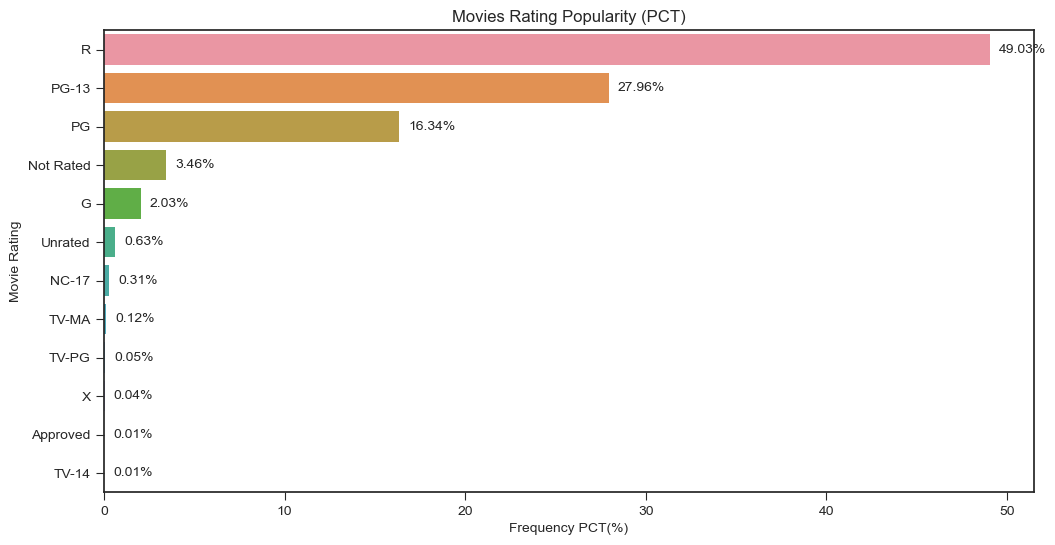

In [179]:
plt.figure(figsize=(12, 6))
sns.barplot(y=rating_pct.index, x=rating_pct.values)
for i, val in enumerate(rating_pct.values):
    plt.text(val + 0.5, i, f'{val:.2f}%', ha='left', va='center')
plt.title('Movies Rating Popularity (PCT)')
plt.xlabel('Frequency PCT(%)')
plt.ylabel('Movie Rating')

In [128]:
#let's crosscheck it

(df["rating"].value_counts() / df.shape[0] * 100).apply(lambda x: f"{x: 0.2f} %")

R             49.03 %
PG-13         27.96 %
PG            16.34 %
Not Rated      3.46 %
G              2.03 %
Unrated        0.63 %
NC-17          0.31 %
TV-MA          0.12 %
TV-PG          0.05 %
X              0.04 %
Approved       0.01 %
TV-14          0.01 %
Name: rating, dtype: object

<h5><b>Genre Column</b></h5>

In [129]:
df['genre'].value_counts()

Comedy       2192
Action       1673
Drama        1468
Crime         542
Biography     433
Adventure     420
Animation     335
Horror        307
Fantasy        43
Mystery        20
Thriller       12
Family         11
Romance         8
Sci-Fi          8
Western         3
Musical         2
Music           1
Sport           1
Name: genre, dtype: int64

In [130]:
genre = df["genre"].value_counts()
genre_pct = genre / len(df) * 100
genre_pct

Comedy      29.3
Action      22.4
Drama       19.6
Crime        7.2
Biography    5.8
Adventure    5.6
Animation    4.5
Horror       4.1
Fantasy      0.6
Mystery      0.3
Thriller     0.2
Family       0.1
Romance      0.1
Sci-Fi       0.1
Western      0.0
Musical      0.0
Music        0.0
Sport        0.0
Name: genre, dtype: float64

Text(0.5, 0, 'Frequency PCT(%)')

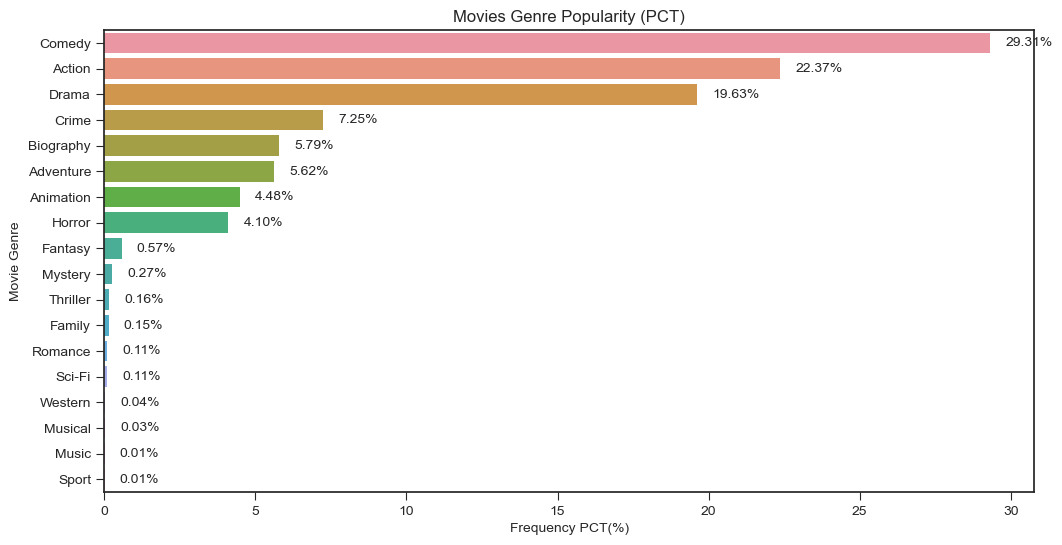

In [178]:
plt.figure(figsize=(12, 6))
sns.barplot(y=genre_pct.index, x=genre_pct.values)
for i, val in enumerate(genre_pct.values):
    plt.text(val + 0.5, i, f'{val:.2f}%', ha='left', va='center')
plt.title('Movies Genre Popularity (PCT)')
plt.ylabel('Movie Genre')
plt.xlabel('Frequency PCT(%)')

In [132]:
#let's crosscheck it

(df["genre"].value_counts() / df.shape[0] * 100).apply(lambda x: f"{x: 0.2f} %")

Comedy        29.31 %
Action        22.37 %
Drama         19.63 %
Crime          7.25 %
Biography      5.79 %
Adventure      5.62 %
Animation      4.48 %
Horror         4.10 %
Fantasy        0.57 %
Mystery        0.27 %
Thriller       0.16 %
Family         0.15 %
Romance        0.11 %
Sci-Fi         0.11 %
Western        0.04 %
Musical        0.03 %
Music          0.01 %
Sport          0.01 %
Name: genre, dtype: object

<h5><b>Year Column</b></h5>

In [133]:
year = df['year'].value_counts()
year

2018    200
2009    200
2001    200
2004    200
2005    200
2007    200
2003    200
2002    200
2012    200
2013    200
2014    200
2016    200
2017    200
2011    199
1996    199
1997    199
2006    199
2015    199
2008    199
2010    198
1993    198
1994    198
1995    197
2000    196
2019    196
1991    196
1999    195
1998    194
1990    191
1988    191
1992    190
1989    189
1987    188
1986    186
1985    177
1984    158
1983    128
1982    119
1981    104
1980     81
2020     15
Name: year, dtype: int64

Text(0, 0.5, 'Movie Counts')

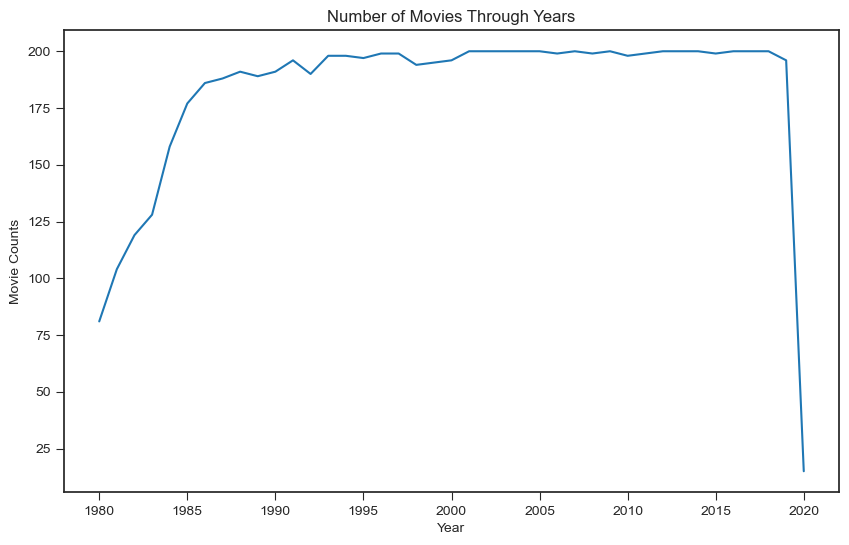

In [134]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=year)
plt.title('Number of Movies Through Years')
plt.xlabel('Year')
plt.ylabel('Movie Counts')

<h5><b>Score Column</b></h5>

In [135]:
df['score'].describe()

count   7,479.0
mean        6.4
std         1.0
min         1.9
25%         5.8
50%         6.5
75%         7.1
max         9.3
Name: score, dtype: float64

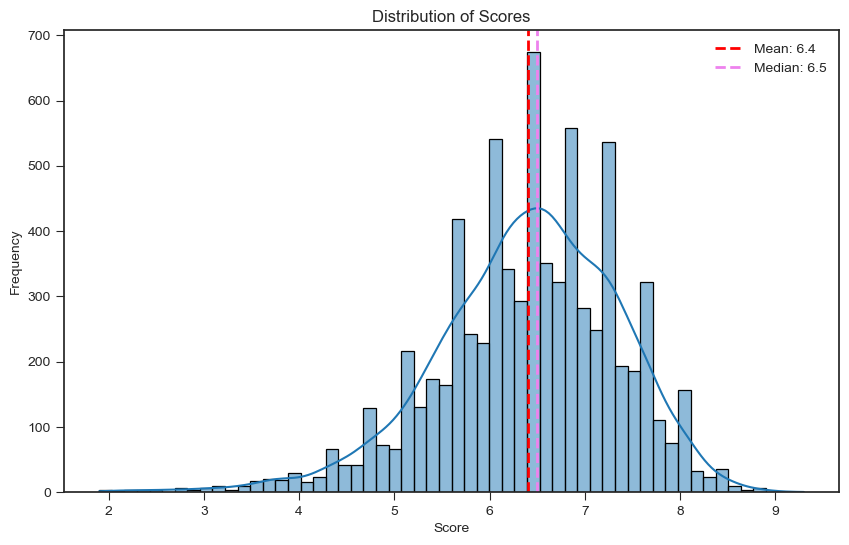

In [175]:
#i need to see the distribution of the data

plt.figure(figsize=(10, 6))
sns.histplot(df["score"], kde=True)

#Creating mean and median line
plt.axvline(x=df["score"].mean(), color="red", linestyle="--", linewidth=2, label=f"Mean: {df['score'].mean():.1f}")
plt.axvline(x=df["score"].median(), color="violet", linestyle="--", linewidth=2, label=f"Median: {df['score'].median():.1f}")

plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Scores")
plt.legend()

In [137]:
print(f"The Skew of The Score Data: {df['score'].skew(): 0.2f}")

The Skew of The Score Data: -0.61


<h5><b>Director Column</b></h5>

In [138]:
director = df['director'].value_counts()
director

Woody Allen         38
Clint Eastwood      31
Directors           27
Steven Spielberg    27
Ron Howard          24
                    ..
Kinka Usher          1
Daniel Myrick        1
Tony Cinciripini     1
Rodney Gibbons       1
Kevin Shulman        1
Name: director, Length: 2846, dtype: int64

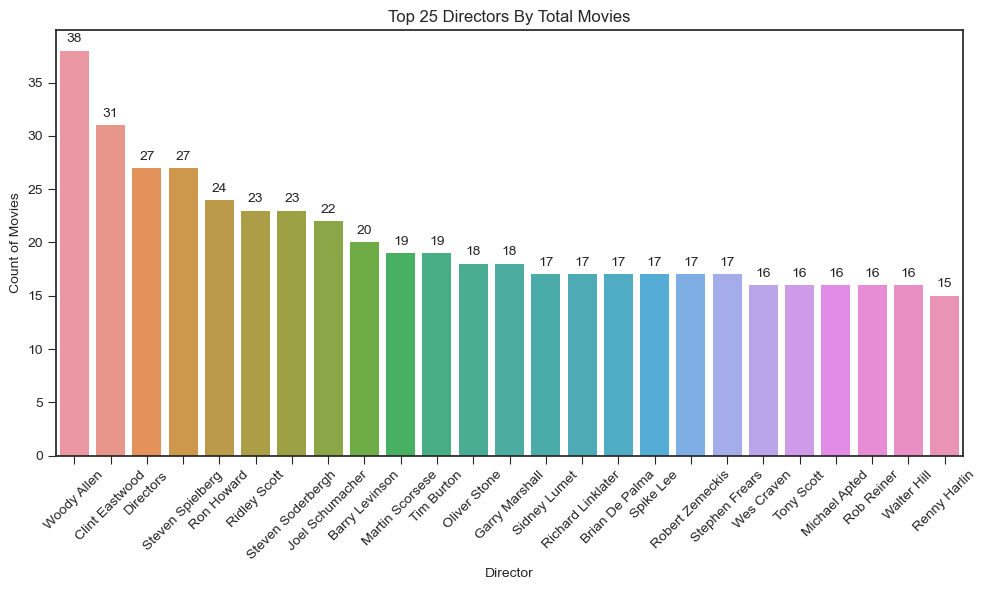

In [174]:
director = director.nlargest(25)
plt.figure(figsize=(10, 6))
sns.barplot(x=director.index, y=director.values)
for i, val in enumerate(director.values):
    plt.text(i, val + 0.5, f'{val}', ha='center', va='bottom')
plt.title('Top 25 Directors By Total Movies')
plt.xlabel('Director')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45)
plt.tight_layout()

<h5><b>Star Column</b></h5>

In [140]:
star = df['star'].value_counts()
star

Nicolas Cage         43
Tom Hanks            41
Robert De Niro       41
Denzel Washington    37
Tom Cruise           34
                     ..
Vincent Perez         1
Dennis Miller         1
Teri Hatcher          1
Pamela Anderson       1
Kristina Klebe        1
Name: star, Length: 2692, dtype: int64

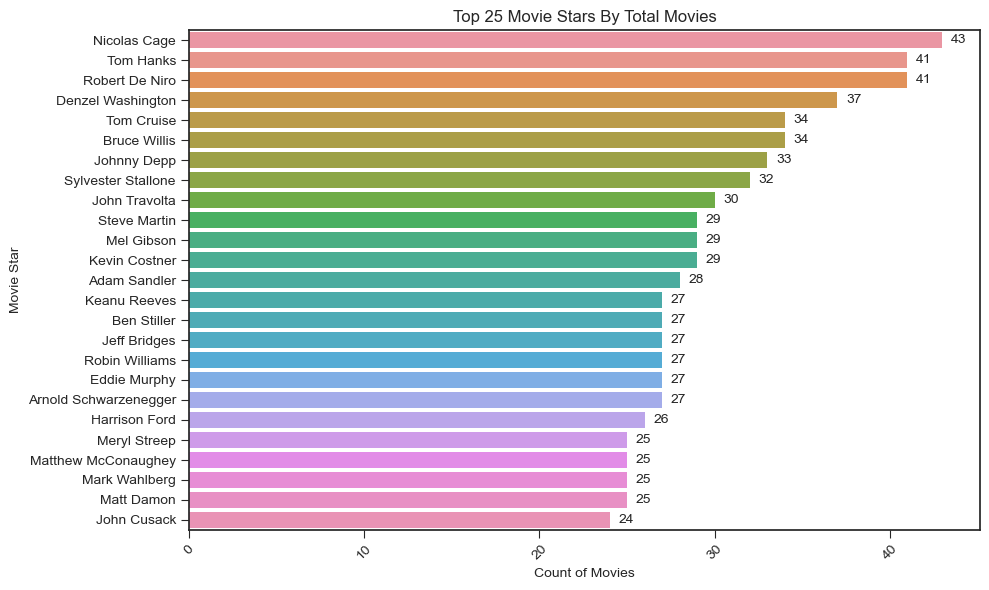

In [177]:
star = star.nlargest(25)
plt.figure(figsize=(10, 6))
sns.barplot(x=star.values, y=star.index)
for i, val in enumerate(star.values):
    plt.text(val + 0.5, i, f'{val}', ha='left', va='center')
plt.title('Top 25 Movie Stars By Total Movies')
plt.xlabel('Count of Movies')
plt.ylabel('Movie Star')
plt.xticks(rotation=45)
plt.tight_layout()

<h5><b>Country Column</b></h5>

In [142]:
country = df['country'].value_counts()
country

United States                     5378
United Kingdom                     798
France                             262
Canada                             183
Germany                            116
Australia                           86
Japan                               76
India                               59
Italy                               57
Spain                               44
Ireland                             42
China                               40
Hong Kong                           40
South Korea                         35
Denmark                             31
Sweden                              25
New Zealand                         24
Mexico                              22
Norway                              12
West Germany                        11
Netherlands                         10
Switzerland                         10
Russia                               8
Belgium                              8
Czech Republic                       8
Iran                     

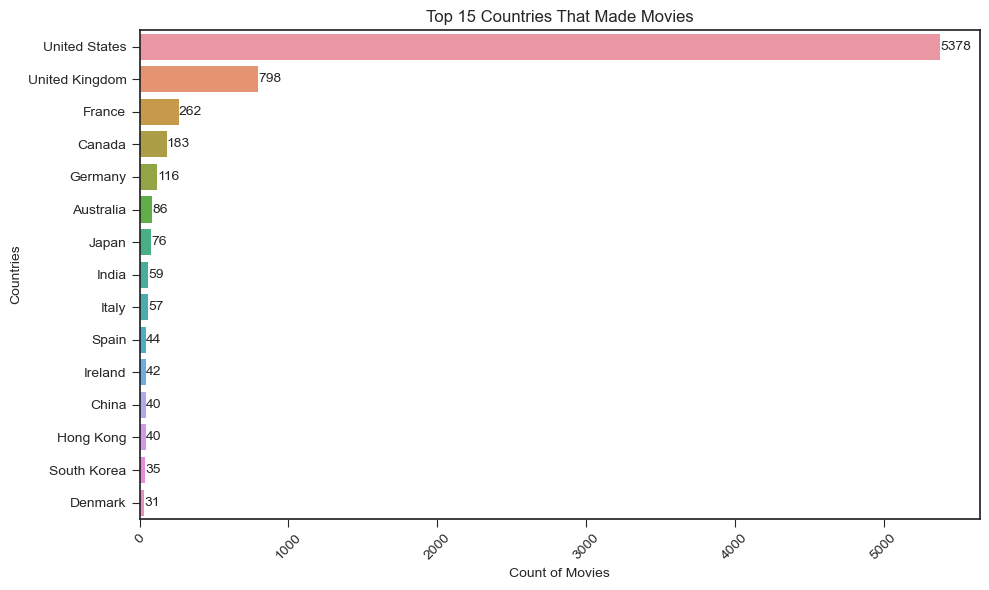

In [143]:
country = country.nlargest(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=country.values, y=country.index)

# Add labels on each bar
for i, val in enumerate(country.values):
    plt.text(val + 0.5, i, f'{val}', ha='left', va='center')

# Add title and labels
plt.title('Top 15 Countries That Made Movies')
plt.xlabel('Count of Movies')
plt.ylabel('Countries')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Correlation analysis using heatmap</h3>

Here is a table to guide in concluding correlation strength

| Correlation Coefficient | Correlation Strength | Correlation Type |
|-------------------------|----------------------|------------------|
|       -0.7 to -1        |      Very Strong     |     Negative     |
|       -0.5 to -.7       |         Strong       |     Negative     |
|       -0.3 to -.5       |        Moderate      |     Negative     |
|        0 to -0.3        |          Weak        |     Negative     |
|            0            |          None        |       Zero       |
|        0 to 0.3         |          Weak        |     Positive     |
|        0.3 to 0.5       |        Moderate      |     Positive     |
|        0.5 to 0.7       |         Strong       |     Positive     |
|        0.7 to 1         |      Very Strong     |     Positive     |


<h5><b>Creating correlation table for correlation analysis viz</b></h5>

In [144]:
# 

df1 = df
df_numerized = df1

In [145]:
df_numerized.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [146]:
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [147]:
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6428,6,6,1980,1669,8.4,"927,000.0",2500,3890,994,52,"19,000,000.0","46,998,772.0",2213,146.0
1,5426,6,1,1980,1460,5.8,"65,000.0",2189,1578,313,53,"4,500,000.0","58,853,106.0",701,104.0
2,5006,4,0,1980,1733,8.7,"1,200,000.0",1072,2485,1666,53,"18,000,000.0","538,375,067.0",1470,124.0
3,280,4,4,1980,1460,7.7,"221,000.0",1260,1936,2146,53,"3,500,000.0","83,453,539.0",1728,88.0
4,1001,6,4,1980,1509,7.3,"108,000.0",1019,507,394,53,"6,000,000.0","39,846,344.0",1695,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,6321,6,5,2020,91,5.4,"2,400.0",2430,3760,2336,53,"20,500,000.0","3,661.0",1817,98.0
7655,3105,9,2,2020,2748,6.6,"1,300.0",2620,4358,885,8,"20,500,000.0","240,663,149.0",360,110.0
7656,6851,5,4,2020,1847,5.0,294.0,2425,3753,2276,53,"20,500,000.0","413,378.0",1819,120.0
7657,3088,6,6,2020,3205,6.7,903.0,2112,1932,870,8,"20,500,000.0","25,818,882.0",2175,135.0


In [148]:
#cast df again
df = pd.read_csv(r"D:\nevinphilbert\Portfolio\Python Builder\Movies Correlation Analysis\movies (cleaned).csv")
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,"927,000.0",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.0","46,998,772.0",Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,"65,000.0",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.0","58,853,106.0",Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,"1,200,000.0",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.0","538,375,067.0",Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,"221,000.0",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.0","83,453,539.0",Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,"108,000.0",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.0","39,846,344.0",Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,"2,400.0",Scott Teems,Scott Teems,Shea Whigham,United States,"20,500,000.0","3,661.0",Prowess Pictures,98.0
7475,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,"1,300.0",Teng Cheng,Woody Allen,Guangtao Jiang,China,"20,500,000.0","240,663,149.0",Beijing Enlight Pictures,110.0
7476,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,"20,500,000.0","413,378.0",Pryor Entertainment,120.0
7477,Leap,R,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,"20,500,000.0","25,818,882.0",Universal Pictures,135.0


In [149]:
df_corr = df_numerized.corr(method = 'pearson')
df_corr

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
rating,-0.0,1.0,0.1,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.1,-0.1,-0.1,0.1
genre,0.0,0.1,1.0,-0.1,0.0,0.0,-0.1,-0.0,0.0,-0.0,-0.0,-0.3,-0.2,-0.1,-0.0
year,0.0,0.0,-0.1,1.0,0.0,0.1,0.2,-0.0,-0.0,-0.0,-0.1,0.3,0.3,-0.0,0.1
released,-0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
score,0.0,0.0,0.0,0.1,0.0,1.0,0.4,0.0,0.0,0.0,-0.1,0.1,0.2,-0.0,0.4
votes,0.0,0.0,-0.1,0.2,0.0,0.4,1.0,0.0,0.0,-0.0,0.1,0.5,0.6,0.1,0.3
director,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,1.0,0.3,0.0,0.0,-0.0,-0.0,0.0,0.0
writer,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.3,1.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
star,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0


<h5><b>Creating Heatmap</b></h5>

In [150]:
df_corr.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
rating,-0.0,1.0,0.1,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.1,-0.1,-0.1,0.1
genre,0.0,0.1,1.0,-0.1,0.0,0.0,-0.1,-0.0,0.0,-0.0,-0.0,-0.3,-0.2,-0.1,-0.0
year,0.0,0.0,-0.1,1.0,0.0,0.1,0.2,-0.0,-0.0,-0.0,-0.1,0.3,0.3,-0.0,0.1
released,-0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0


Text(0.5, 1.0, 'Correlation of All Columns')

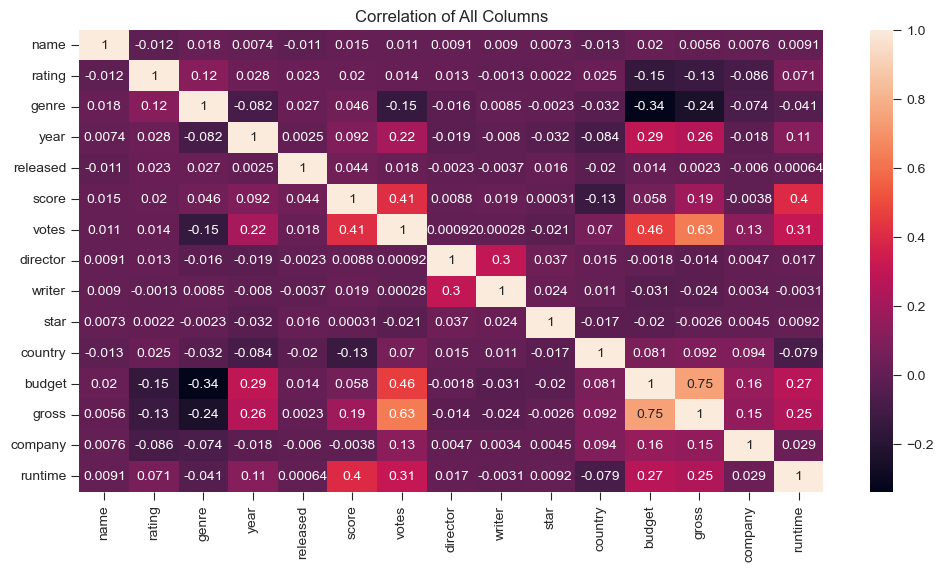

In [151]:
sns.heatmap(df_corr, annot=True)
plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Correlation of All Columns')

The columns that has strong correlations are:
<ul>
    <li>Budget and Gross, with 0.75 correlation coefficient. Showing very strong positive correlation type</li>
    <li>Budget and Votes, with 0.63 correlation coefficient. Showing strong positive correlation type</li>
</ul>

<h5><b>Visualizing Scatter Plot to describe correlation between variables easier</b></h5>

Text(0.5, 1.0, 'Relationship between Budget and Gross Earnings')

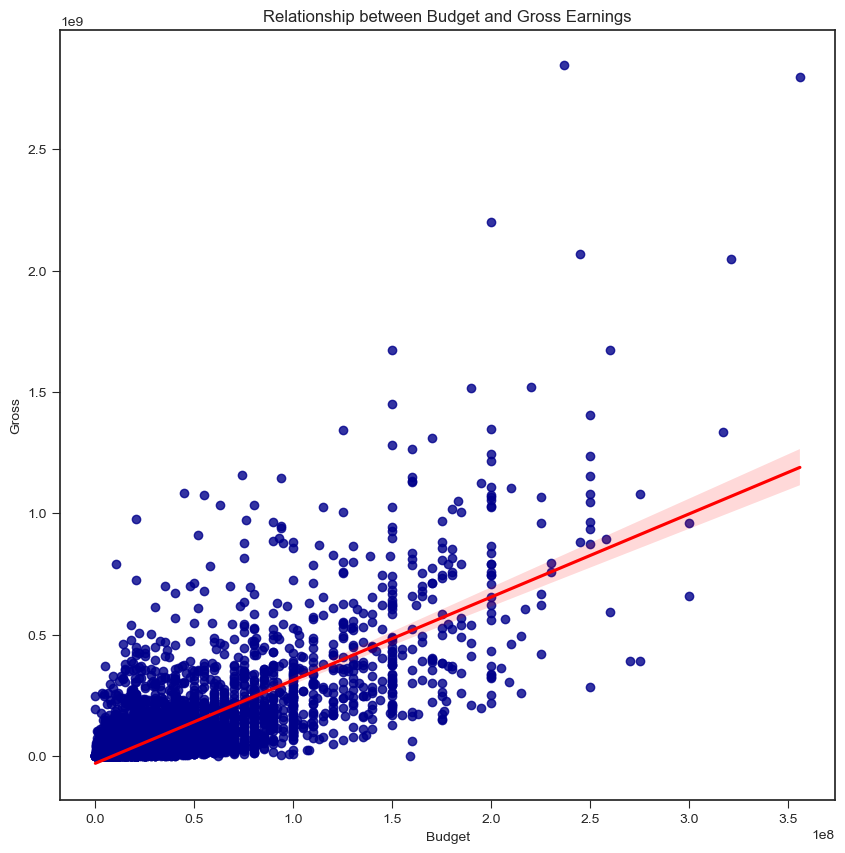

In [152]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'red'})
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Relationship between Budget and Gross Earnings')

<b>The more budget spent, the more gross earnings is expected</b>

Text(0.5, 1.0, 'Relationship between Votes and Gross Earnings')

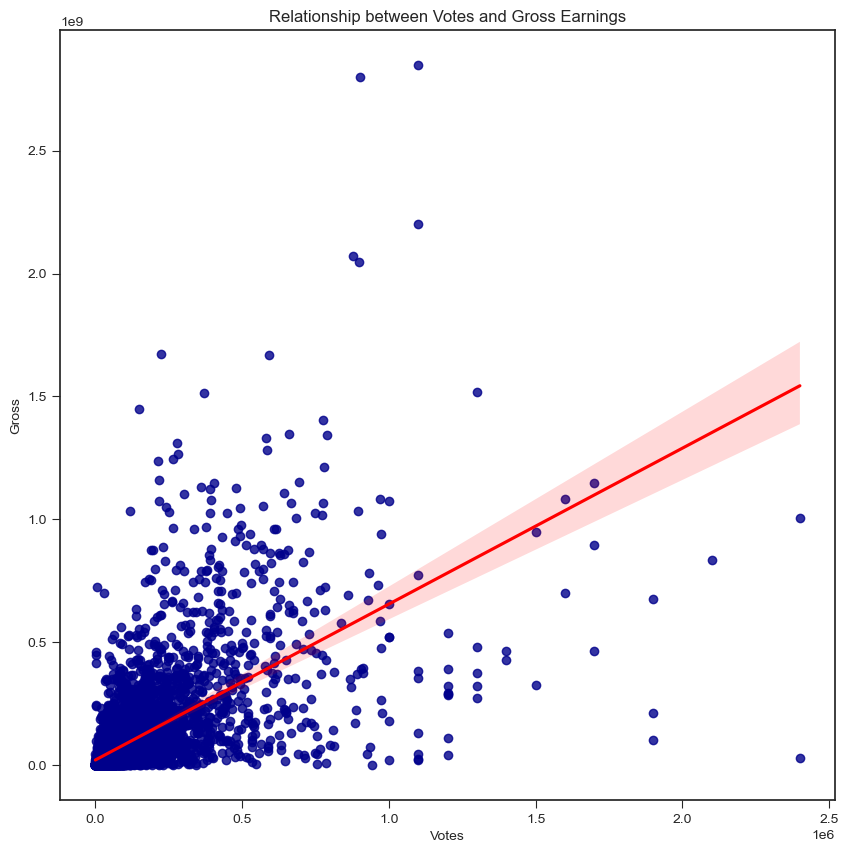

In [153]:
sns.regplot(x='votes', y='gross', data=df, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'red'})
plt.xlabel('Votes')
plt.ylabel('Gross')
plt.title('Relationship between Votes and Gross Earnings')

<b>The higher votes the movie gets, the more gross earnings is expected</b>

<h3>Answering business questions with viz</h3>

<h5><b>Getting overviews of data again</b></h5>

In [246]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,"927,000.0",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.0","46,998,772.0",Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,"65,000.0",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.0","58,853,106.0",Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,"1,200,000.0",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.0","538,375,067.0",Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,"221,000.0",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.0","83,453,539.0",Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,"108,000.0",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.0","39,846,344.0",Orion Pictures,98.0


<h5><b>What are the top 25 rated movies?</b></h5>

In [155]:
filter = df.nlargest(25, 'score')
top_rated_movies = filter[['name', 'score']].reset_index(drop=True)
top_rated_movies

,name,score
0,The Shawshank Redemption,9.3
1,The Dark Knight,9.0
2,Schindler's List,8.9
3,Pulp Fiction,8.9
4,The Lord of the Rings: The Return of the King,8.9
5,Forrest Gump,8.8
6,Fight Club,8.8
7,The Lord of the Rings: The Fellowship of the Ring,8.8
8,Inception,8.8
9,Star Wars: Episode V - The Empire Strikes Back,8.7


Text(0.5, 1.0, 'Top 25 Rated Movies')

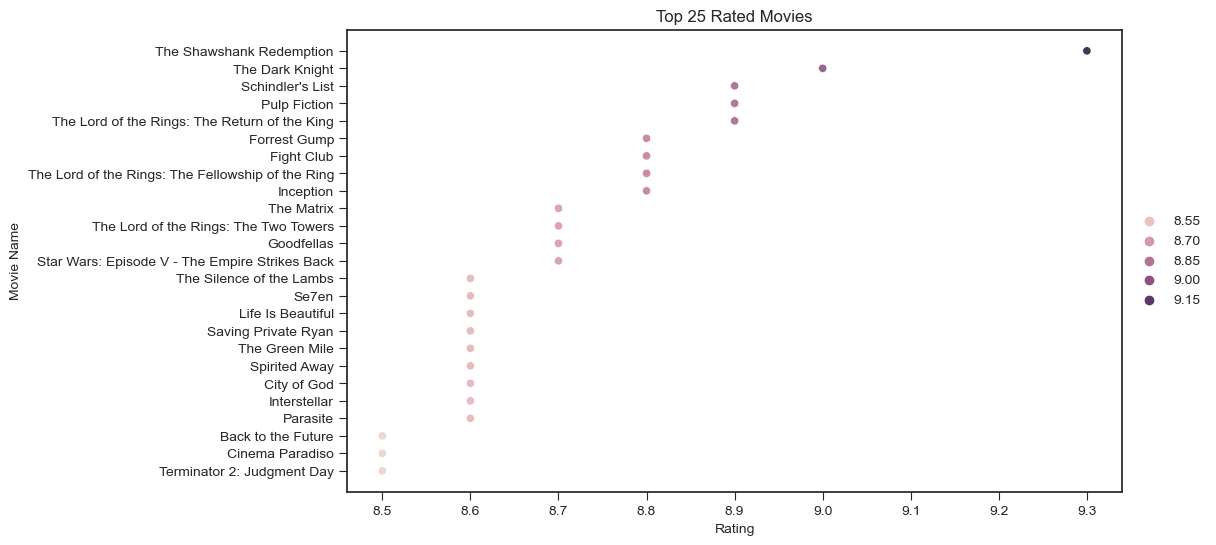

In [156]:
top_rated_movies = top_rated_movies.sort_values(by='score', ascending=False)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_rated_movies, x='score', y='name', hue='score', alpha=0.89)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Rating')
plt.ylabel('Movie Name')
plt.title('Top 25 Rated Movies')

<h5><b>What are the sum gross and average gross earnings through the years?</b></h5>

In [157]:
gross_per_year = df.groupby("year")["gross"].sum().reset_index()
gross_per_year.head()

,year,gross
0,1980,"2,483,666,964.0"
1,1981,"2,520,064,889.0"
2,1982,"3,187,580,517.0"
3,1983,"2,750,004,626.0"
4,1984,"3,533,092,196.0"


In [158]:
avg_gross_per_year = df.groupby("year")["gross"].mean().reset_index()
avg_gross_per_year.head()

,year,gross
0,1980,"30,662,555.1"
1,1981,"24,231,393.2"
2,1982,"26,786,390.9"
3,1983,"21,484,411.1"
4,1984,"22,361,343.0"


In [159]:
#creating custom function to sort the gross

def format_gross(gross):
    if gross >= 1_000_000_000_000:
        return f'{gross / 1_000_000_000_000:.2f}t'
    elif gross >= 1_000_000_000:
        return f'{gross / 1_000_000_000:.2f}b'
    elif gross >= 1_000_000:
        return f'{gross / 1_000_000:.2f}m'
    elif gross >= 1_000:
        return f'{gross / 1_000:.2f}k'
    else:
        return f'{gross:.2f}'

In [160]:
gross_per_year['gross_m'] =  gross_per_year['gross'].apply(format_gross)
gross_per_year.sort_values(by=['gross'], ascending=False).head()

,year,gross,gross_m
39,2019,"30,339,653,041.0",30.34b
36,2016,"28,938,844,792.0",28.94b
37,2017,"28,485,248,415.0",28.49b
38,2018,"28,085,289,459.0",28.09b
35,2015,"26,746,011,088.0",26.75b


In [161]:
avg_gross_per_year['gross_m'] =  avg_gross_per_year['gross'].apply(format_gross)
avg_gross_per_year.sort_values(by=['gross'], ascending=False).head()

,year,gross,gross_m
40,2020,"189,886,586.1",189.89m
39,2019,"154,794,148.2",154.79m
36,2016,"144,694,224.0",144.69m
37,2017,"142,426,242.1",142.43m
38,2018,"140,426,447.3",140.43m


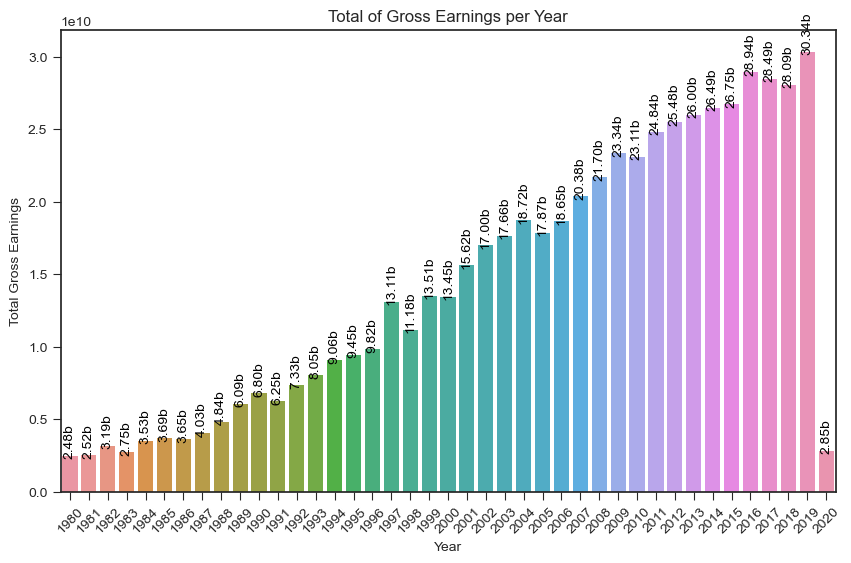

In [162]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gross_per_year, x='year', y='gross')
for index, row in gross_per_year.iterrows():
    plt.text(index, row['gross'], row['gross_m'], color='black', ha='center', rotation=90)
plt.xlabel('Year')
plt.ylabel('Total Gross Earnings')
plt.title('Total of Gross Earnings per Year')
plt.xticks(rotation=45);

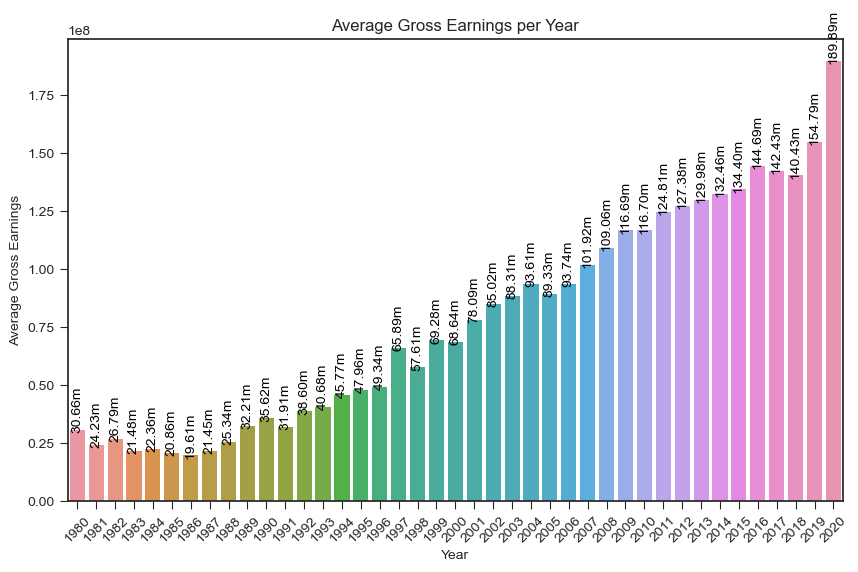

In [163]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_gross_per_year, x='year', y='gross')
for index, row in avg_gross_per_year.iterrows():
    plt.text(index, row['gross'], row['gross_m'], color='black', ha='center', rotation=90)
plt.xlabel('Year')
plt.ylabel('Average Gross Earnings')
plt.title('Average Gross Earnings per Year')
plt.xticks(rotation=45);

<h5><b>What are the Top 10 Companies by Total Gross Revenue?</b></h5>

In [164]:
gross_per_company = df.groupby('company')['gross'].sum().reset_index().sort_values(by=['gross'], ascending=False).head(10)
gross_per_company

,company,gross
2213,Warner Bros.,"56,491,421,806.0"
2175,Universal Pictures,"52,559,667,069.0"
701,Columbia Pictures,"43,008,941,346.0"
1728,Paramount Pictures,"40,493,607,415.0"
2148,Twentieth Century Fox,"40,257,053,857.0"
2210,Walt Disney Pictures,"36,327,887,792.0"
1632,New Line Cinema,"19,883,797,684.0"
1532,Marvel Studios,"15,065,592,411.0"
849,DreamWorks Animation,"11,873,612,858.0"
2128,Touchstone Pictures,"11,795,832,638.0"


In [165]:
gross_per_company['gross_m'] = gross_per_company['gross'].apply(format_gross)
gross_per_company_sort = gross_per_company.sort_values(by=['gross'], ascending=False)
gross_per_company_sort

,company,gross,gross_m
2213,Warner Bros.,"56,491,421,806.0",56.49b
2175,Universal Pictures,"52,559,667,069.0",52.56b
701,Columbia Pictures,"43,008,941,346.0",43.01b
1728,Paramount Pictures,"40,493,607,415.0",40.49b
2148,Twentieth Century Fox,"40,257,053,857.0",40.26b
2210,Walt Disney Pictures,"36,327,887,792.0",36.33b
1632,New Line Cinema,"19,883,797,684.0",19.88b
1532,Marvel Studios,"15,065,592,411.0",15.07b
849,DreamWorks Animation,"11,873,612,858.0",11.87b
2128,Touchstone Pictures,"11,795,832,638.0",11.80b


Text(0.5, 1.0, 'Top 10 Companies with Total Gross Earnings')

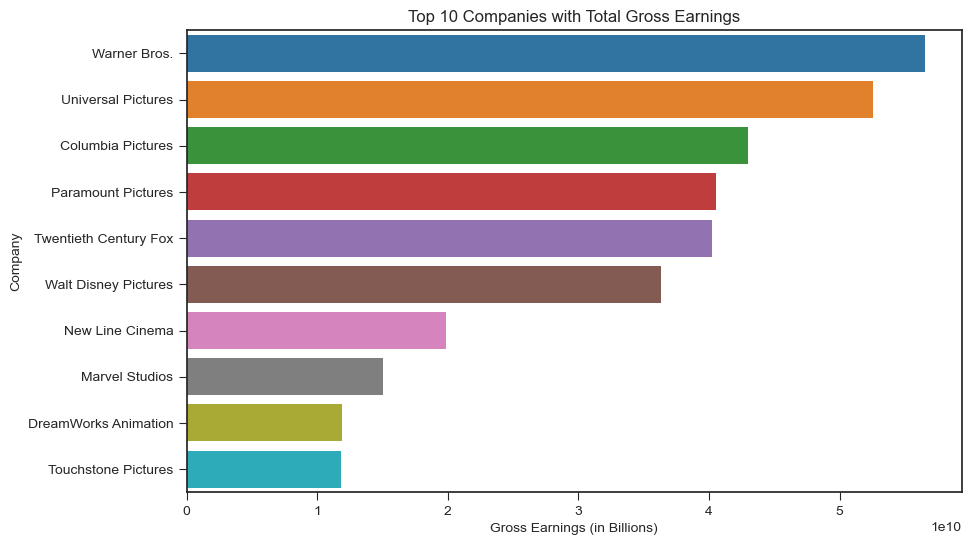

In [166]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gross_per_company_sort, y='company', x='gross')
plt.xlabel('Gross Earnings (in Billions)')
plt.ylabel('Company')
plt.title('Top 10 Companies with Total Gross Earnings')

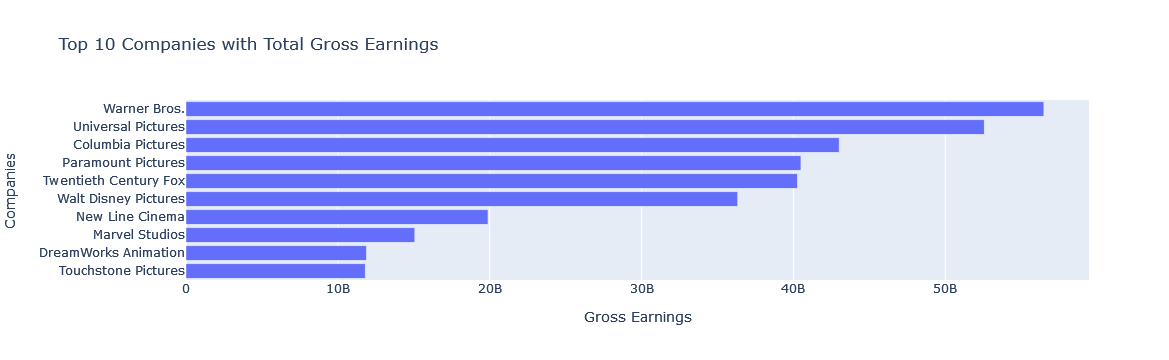

In [234]:
import plotly.express as px

fig = px.bar(gross_per_company_sort, 
             y='company', 
             x='gross',
             orientation='h',
             labels={"gross": "Gross Earnings", "company": "Companies"},
             title='Top 10 Companies with Total Gross Earnings')
fig.update_yaxes(categoryorder='total ascending')
fig.update_traces(textposition='outside')

<h5><b>Top 10 Companies by Average Gross Revenue?</b></h5>

In [168]:
avg_gross_per_company = df.groupby('company')['gross'].mean().reset_index().sort_values(by=['gross'], ascending=False).head(10)
avg_gross_per_company.rename(columns={'gross':'avg_gross'}, inplace=True)
avg_gross_per_company

,company,avg_gross
1532,Marvel Studios,"1,255,466,034.2"
1255,Illumination Entertainment,"1,097,122,396.5"
967,Fairview Entertainment,"966,554,929.0"
295,B24,"880,681,519.0"
285,Avi Arad Productions,"856,085,151.0"
624,Chris Morgan Productions,"759,056,935.0"
1337,Jolie Pas,"758,411,779.0"
691,Coco Cartoon,"726,264,074.0"
1470,Lucasfilm,"718,535,219.2"
1531,Marvel Entertainment,"714,421,503.0"


In [169]:
avg_gross_per_company['avg_gross_m'] = avg_gross_per_company['avg_gross'].apply(format_gross)
avg_gross_per_company_sort = avg_gross_per_company.sort_values(by=['avg_gross'], ascending=False)
avg_gross_per_company_sort

,company,avg_gross,avg_gross_m
1532,Marvel Studios,"1,255,466,034.2",1.26b
1255,Illumination Entertainment,"1,097,122,396.5",1.10b
967,Fairview Entertainment,"966,554,929.0",966.55m
295,B24,"880,681,519.0",880.68m
285,Avi Arad Productions,"856,085,151.0",856.09m
624,Chris Morgan Productions,"759,056,935.0",759.06m
1337,Jolie Pas,"758,411,779.0",758.41m
691,Coco Cartoon,"726,264,074.0",726.26m
1470,Lucasfilm,"718,535,219.2",718.54m
1531,Marvel Entertainment,"714,421,503.0",714.42m


Text(0.5, 1.0, 'Top 10 Companies by Average Gross Earnings')

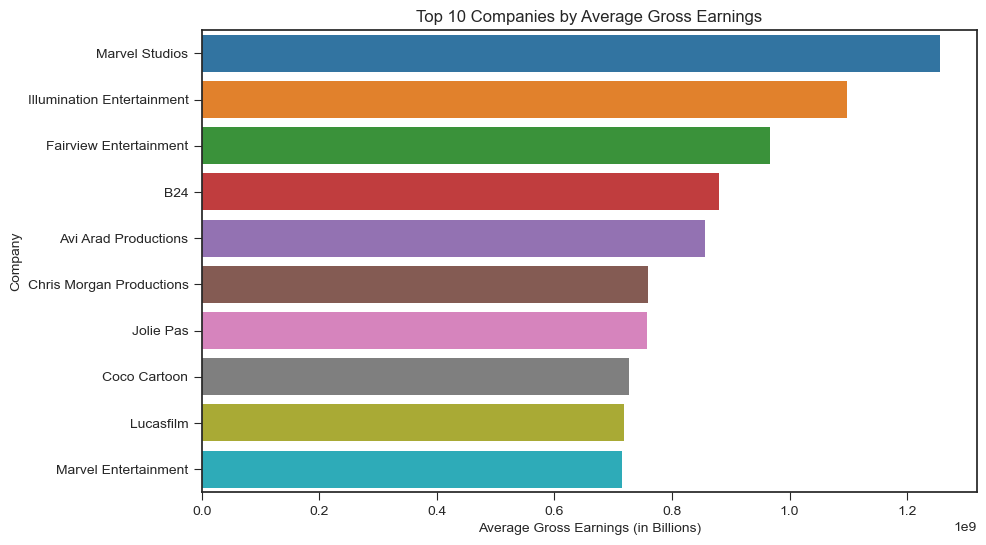

In [170]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_gross_per_company_sort, y='company', x='avg_gross')
plt.xlabel('Average Gross Earnings (in Billions)')
plt.ylabel('Company')
plt.title('Top 10 Companies by Average Gross Earnings')

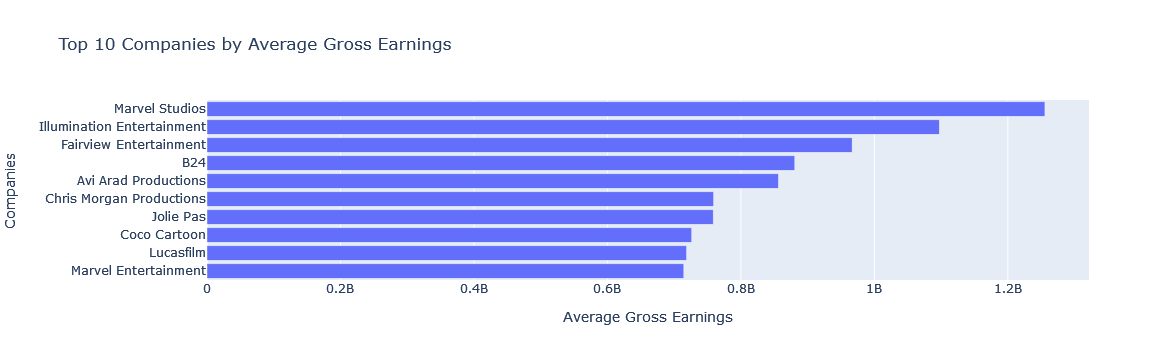

In [171]:
fig = px.bar(avg_gross_per_company_sort, 
             y='company', 
             x='avg_gross',
             orientation='h',
             labels={"gross": "Gross Earnings (in Billions)", "company": "Company"},
             title='Top 10 Companies by Average Gross Earnings')
fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(xaxis = dict(title='Average Gross Earnings'), yaxis = dict(title='Companies'))

<h5><b>Top 10 Actors that bring:</b></h5>
<h5><ul>
    <li>A. Most Revenue</li>
    <li>B. Most Rating</li>
    <li>C. Most Voted by IMDB</li>
</ul></h5>

In [185]:
star_revenue_bringer = df.groupby('star')['gross'].sum().reset_index().sort_values(by=['gross'], ascending=False).head(10)
avg_star_revenue_bringer = df.groupby('star')['gross'].mean().reset_index().sort_values(by=['gross'], ascending=False).head(10)
star_most_rated = df.groupby('star')['score'].mean().reset_index().sort_values(by=['score'], ascending=False).head(10)
star_most_voted = df.groupby('star')['votes'].sum().reset_index().sort_values(by=['votes'], ascending=False).head(10)
avg_star_most_voted = df.groupby('star')['votes'].mean().reset_index().sort_values(by=['votes'], ascending=False).head(10)

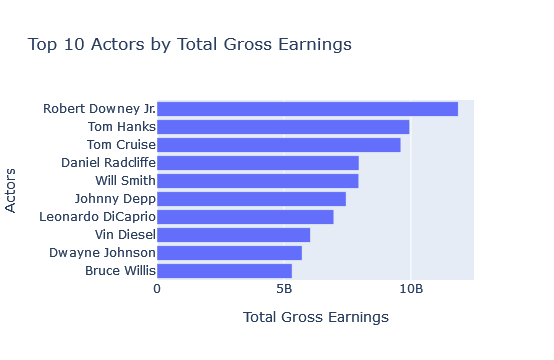

In [189]:
fig = px.bar(star_revenue_bringer, 
             y='star', 
             x='gross',
             orientation='h',
             labels={"gross": "Total Gross Earnings", "star": "Actors"},
             title='Top 10 Actors by Total Gross Earnings')
fig.update_yaxes(categoryorder='total ascending')

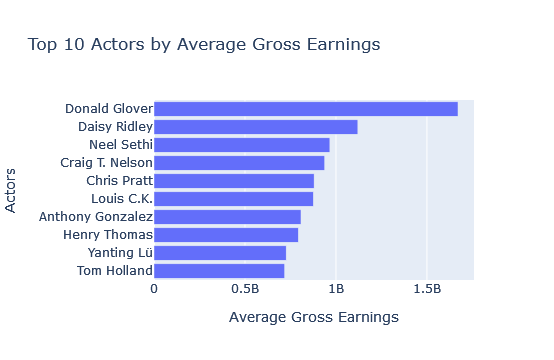

In [188]:
fig = px.bar(avg_star_revenue_bringer, 
             y='star', 
             x='gross',
             orientation='h',
             labels={"gross": "Average Gross Earnings", "star": "Actors"},
             title='Top 10 Actors by Average Gross Earnings')
fig.update_yaxes(categoryorder='total ascending')

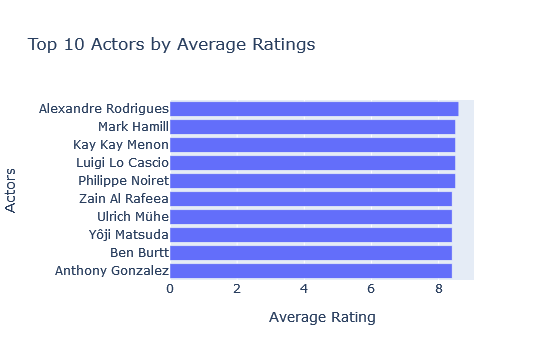

In [190]:
fig = px.bar(star_most_rated, 
             y='star', 
             x='score',
             orientation='h',
             labels={"score": "Average Rating", "star": "Actors"},
             title='Top 10 Actors by Average Ratings')
fig.update_yaxes(categoryorder='total ascending')

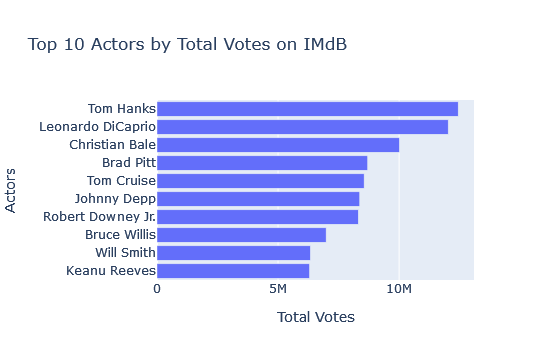

In [191]:
fig = px.bar(star_most_voted, 
             y='star', 
             x='votes',
             orientation='h',
             labels={"votes": "Total Votes", "star": "Actors"},
             title='Top 10 Actors by Total Votes on IMdB')
fig.update_yaxes(categoryorder='total ascending')

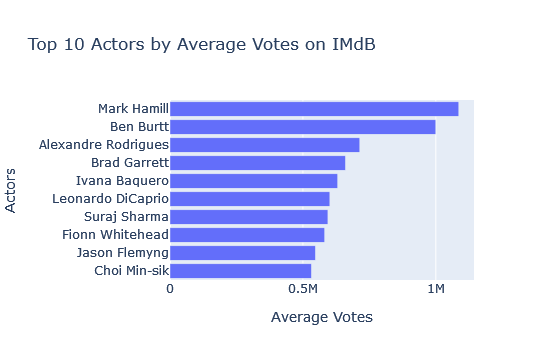

In [193]:
fig = px.bar(avg_star_most_voted, 
             y='star', 
             x='votes',
             orientation='h',
             labels={"votes": "Average Votes", "star": "Actors"},
             title='Top 10 Actors by Average Votes on IMdB')
fig.update_yaxes(categoryorder='total ascending')

<h5><b>Distribution of Top Genre by Frequency, Total Gross and Average Gross Earnings from Each Year</b></h5>

In [279]:
total_movies_by_genre = df.groupby('genre')['name'].count().reset_index().sort_values(by=['name'], ascending=False)
total_movies_by_genre.rename(columns={'name':'total movies'}, inplace=True)

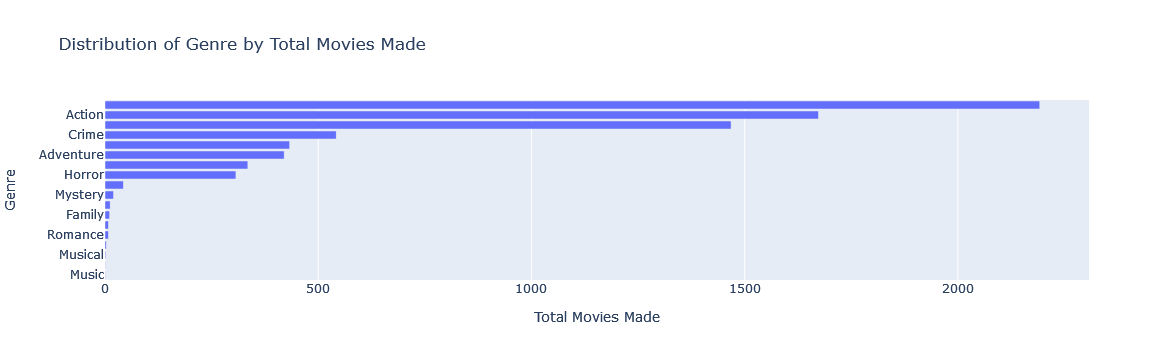

In [288]:
fig = px.bar(total_movies_by_genre, y='genre', x='total movies', orientation='h',
            labels={"total movies": "Total Movies Made", "genre": "Genre"},
            title='Distribution of Genre by Total Movies Made')
fig.update_yaxes(categoryorder='total ascending')

<b>I guess we can only take Top 3 since the rest of the data are too far below</b>

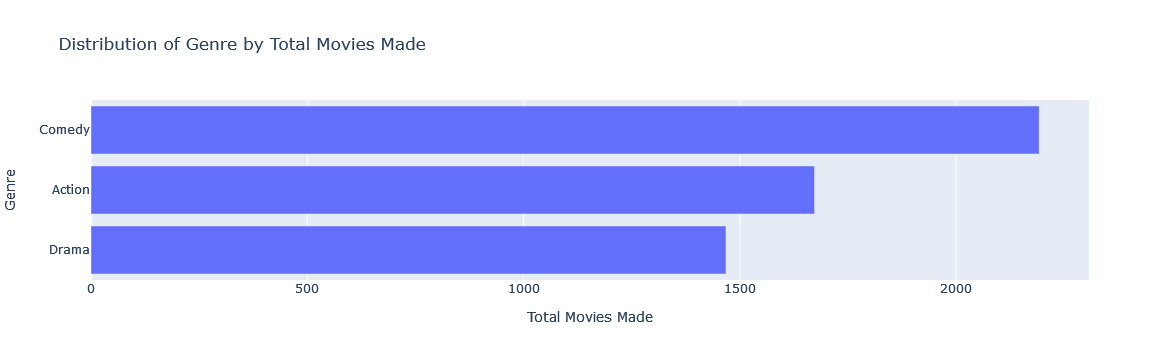

In [282]:
fig = px.bar(total_movies_by_genre.nlargest(3, columns = 'total movies'), 
            y='genre', x='total movies', orientation='h',
            labels={"total movies": "Total Movies Made", "genre": "Genre"},
            title='Distribution of Genre by Total Movies Made')
fig.update_yaxes(categoryorder='total ascending')

In [291]:
year_vs_genre = df.groupby("year", as_index=False)["genre"].value_counts()
filt = year_vs_genre.groupby("year")["count"].nlargest(3).droplevel(0).index
year_vs_genre = year_vs_genre.iloc[filt]
year_vs_genre["year"] = year_vs_genre["year"].astype(str)

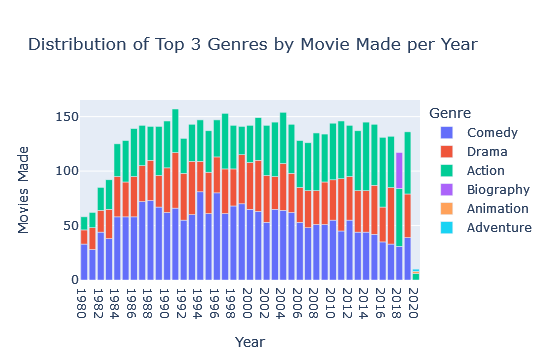

In [290]:
fig = px.bar(year_vs_genre, x='year', y='count', color='genre', 
             labels={'year': 'Year', 'count': 'Movies Made', 'genre': 'Genre'},
             title='Distribution of Top 3 Genres by Movie Made per Year')
fig.show()

<b>Based on this chart we can draw a conclusion that people mostly loves Comedy, Drama and Action movies most of time</b>

In [292]:
year_vs_genre_gross = df.groupby(["year", "genre"], as_index=False)["gross"].sum()
filt = year_vs_genre_gross.groupby("year")["gross"].nlargest(3).droplevel(0).index
year_vs_genre_gross = year_vs_genre_gross.iloc[filt]
year_vs_genre_gross["year"] = year_vs_genre_gross["year"].astype(str)

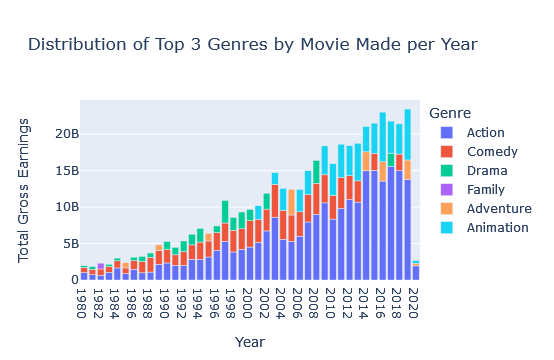

In [294]:
fig = px.bar(year_vs_genre_gross, x='year', y='gross', color='genre', 
             labels={'year': 'Year', 'gross': 'Total Gross Earnings', 'genre': 'Genre'},
             title='Distribution of Top 3 Genres by Gross Earnings per Year')
fig.show()

<b>The most profitable movies to be made based on genre are mostly Action, Adventure and Animation</b>

In [296]:
year_vs_genre_avg_gross = df.groupby(["year", "genre"], as_index=False)["gross"].mean()
filt = year_vs_genre_avg_gross.groupby("year")["gross"].nlargest(3).droplevel(0).index
year_vs_genre_avg_gross = year_vs_genre_avg_gross.iloc[filt]
year_vs_genre_avg_gross["year"] = year_vs_genre_avg_gross["year"].astype(str)

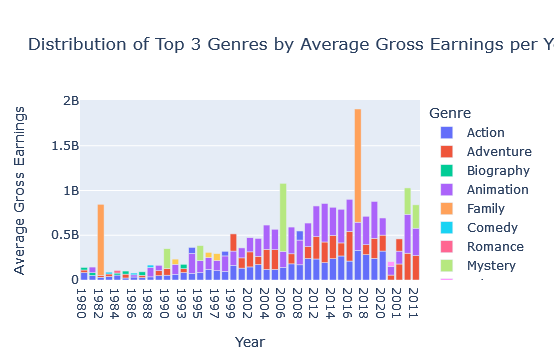

In [298]:
fig = px.bar(year_vs_genre_avg_gross, x='year', y='gross', color='genre', 
             labels={'year': 'Year', 'gross': 'Average Gross Earnings', 'genre': 'Genre'},
             title='Distribution of Top 3 Genres by Average Gross Earnings per Year')
fig.show()

<b>The average of gross earnings to be made based on genre are mostly Action, Adventure and Mystery</b>

<h5><b></b></h5>